## <center style="color:red;">**BrainScan – Détection du Cancer Cérébral par CNN**</center>

Ce projet vise à développer un modèle de Deep Learning capable de classer les images IRM cérébrales afin de détecter le cancer du cerveau avec précision. Il combine CNN, TensorFlow/Keras et OpenCV pour offrir une solution rapide, fiable et utile à l’aide au diagnostic médical.

<br>

### <span style="color:green;">**Chargement et Prétraitement du Dataset :**</span>

#### <span style="color:blue;">**1. Importer les bibliothèques nécessaires :**</span>

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
import cv2

#### <span style="color:blue;">**2. Chargement des Images et Vérification des Extensions :**</span>

**Définir les chemins pour le fichier ZIP et le dossier de décompression :**

In [61]:
zip_path = "../data/zip/Data.zip"
unziped_path = "../data/unziped"

**Décompresser le ZIP si le fichier existe :**

In [62]:
if os.path.exists(zip_path) :
    print(f"Décompression de {zip_path} vers {unziped_path} :")
    with zipfile.ZipFile(zip_path, 'r') as z :
        if os.path.exists(unziped_path) :
            z.extractall(unziped_path)
        else :
            print(f"{unziped_path} Non Trouvé !")
    print("Décompression Terminée.")
else :
    print(f"{zip_path} Non Trouvé !")

Décompression de ../data/zip/Data.zip vers ../data/unziped :
Décompression Terminée.


**Trouver toutes les classes (dossiers/sous-dossiers) :**

In [63]:

classes = []

for d in sorted(os.listdir(unziped_path)) :
    for sub_d in sorted(os.listdir(f"{unziped_path}/{d}")) :
        if os.path.isdir(os.path.join(unziped_path, d, sub_d)):
            classes.append(f"{d}/{sub_d}")

print("classes = ",classes)

classes =  ['Data/glioma', 'Data/meningioma', 'Data/notumor', 'Data/pituitary']


**Définir les extensions d'image autorisées :**

In [64]:
allowed_extensions = ['jpeg', 'jpg', 'bmp', 'png']

# Listes pour stocker les images et leurs labels
images = []
labels = []

**Parcourir chaque classe et charger les images et Supprimer les fichiers avec extensions non autorisées :**

In [65]:
for c in classes :
    
    dir_path = os.path.join(unziped_path, c)

    for img in os.listdir(dir_path) :
        img_path = os.path.join(dir_path, img)

         # Vérifier que c'est un fichier
        if os.path.isfile(img_path) :

            # Récupérer l'extension en minuscule
            img_extension = img.split('.')[1].lower()
            
            if img_extension in allowed_extensions :
                try :
                    # Lire l'image avec OpenCV
                    pic = cv2.imread(img_path)
                    if pic is not None :
                        images.append(pic)              # Ajouter l'image à la liste
                        lbl = str(c.split('/')[1])      # Extraire le label de la sous-classe
                        labels.append(lbl)              # Ajouter le label correspondant
                    else:
                        print(f"Impossible de lire l'image : {img_path}")
                except Exception as e :
                     # Gérer toute erreur de lecture et afficher un message
                    print(f"Erreur lors de la lecture de {img_path} : {e}")
            else :
                # Supprimer le fichier si l'extension n'est pas autorisée
                os.remove(img_path)

In [66]:
print(f"- {len(images)} Images.")
print(f"- {len(labels)} Labels.")

- 7023 Images.
- 7023 Labels.


#### <span style="color:blue;">**3. Exploration et Visualisation des Classes du Dataset :**</span>

**Identifier les classes (dossiers) présentes dans le dataset :**

In [70]:
labels_uniques = []

for c in labels:
    if c not in labels_uniques:
        labels_uniques.append(c)

print(labels_uniques)

['glioma', 'meningioma', 'notumor', 'pituitary']


**Compter le nombre d’images par classe :**

In [ ]:
images_par_label = {}

for lbl in labels:
    if lbl in images_par_label:
        images_par_label[lbl] += 1
    else:
        images_par_label[lbl] = 1

for classe, nombre in images_par_label.items():
    print(f"- {classe} : {nombre} images")


glioma : 1621 images
meningioma : 1645 images
notumor : 2000 images
pituitary : 1757 images


**Visualiser quelques échantillons d’images de chaque classe :**

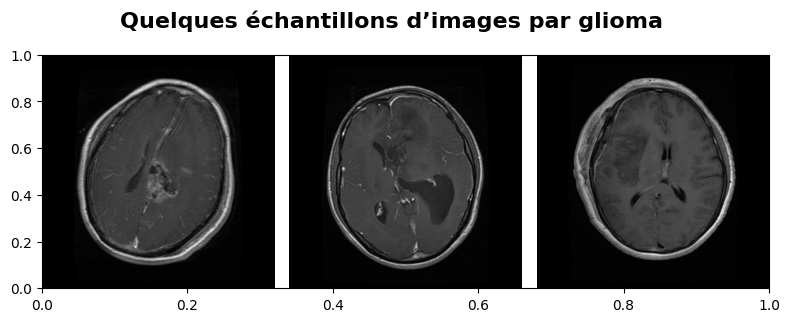

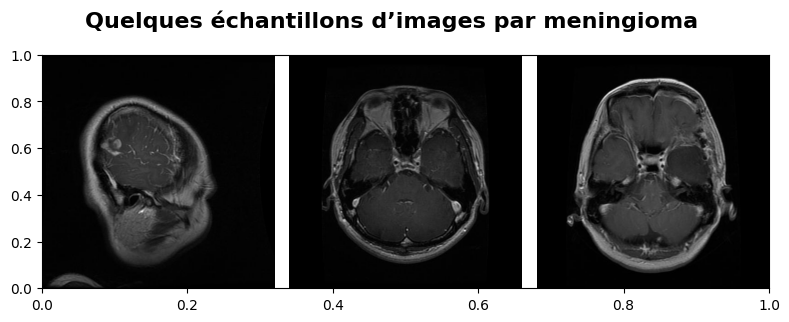

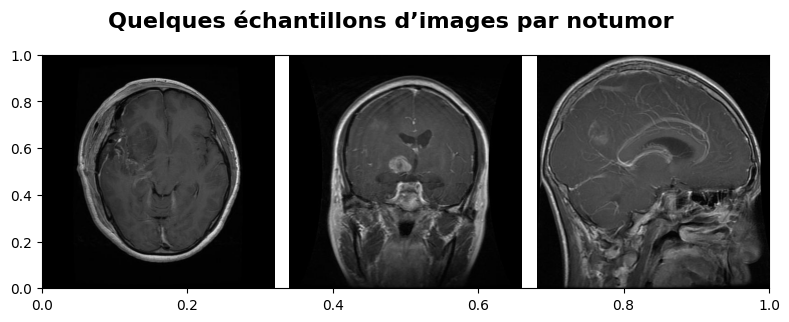

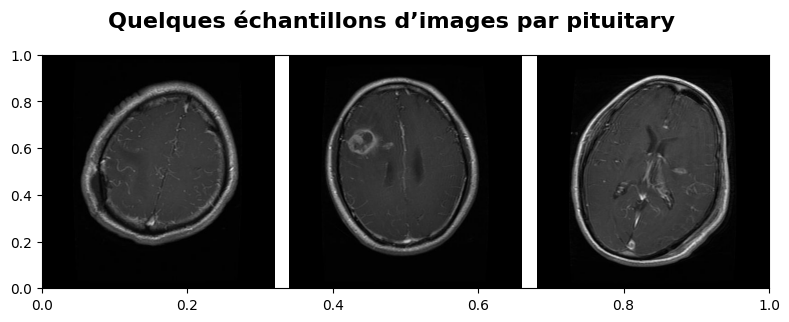

In [ ]:
import random

labels_uniques = sorted(list(set(labels)))

indices = []

for indice, label in enumerate(labels_uniques) :
    
    plt.subplots(figsize=(8, 3))

    for idx, lbl in enumerate(labels) :
        if lbl == labels_uniques[0] :
            indices.append(idx)
        
    echantillon = random.sample(indices, 3)

    for i, j in enumerate(echantillon) :
        plt.subplot(1, 3, i+1)

        img_rgb = cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis("off")

    plt.suptitle(f"Quelques échantillons d’images par {label} ", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    